<a href="https://colab.research.google.com/github/HuiWangCJLU/text_mining/blob/main/investor_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyyaml ua-parser user-agents fake-useragent


基于东方财富股评的爬虫，查询网页源代码进行操作（方便起见文件名没改哈）

In [ ]:
# 爬取东方财富网的股评
from lxml import etree 
# lxml 是一种使用 Python 编写的库；利用etree.HTML()将html字符串转化为element对象
# lxml 是一种使用 Python 编写的库；etree可以从html源码中获取想要的内容
#lxml是XML和HTML的解析器，其主要功能是解析和提取这两种语言文本中的数据；
#也可以利用XPath语法，来定位特定的元素及节点信息
import requests
from fake_useragent import UserAgent # 生成随机请求头，反爬
import time # 延迟，设置时间延迟
import csv
import pandas as pd
f = open('白酒吧股评.csv', 'w', encoding='utf-8-sig', newline="")  # 创建文件对象
# w表示覆盖，a表示追加，r只读方式打开
# newline是为了解决写入时新增行与行之间的一个空白行问题
csv_write = csv.DictWriter(f, fieldnames=['author','title','belong', 'date'])
csv_write.writeheader()
all_read = []
all_title = []
all_author = []
all_date = []
for i in range(1,100):
    print('##################正在抓取第{}页的数据#######################'.format(i))
    url = 'https://stock.finance.sina.com.cn/stock/go.php/vReport_List/kind/industry/index.phtml?p={}'.format(str(i))
    headers = {
        'User-Agent': UserAgent().random
    }
    response = requests.get(url=url, headers=headers)
    html = etree.HTML(response.text)
    #response.text是网页的源码 ，etree.HTML是用来解析网页 构造了一个XPath解析对象并对HTML文本进行自动修正
    # 利用XPath语法，通过标签筛选来定位特定元素的属性值
    read =  html.xpath('//tr//td[6]//text()')
    title1 = html.xpath('//td[contains(@class,"tal f14")]//a[contains(@target,"_blank")]')
    title = []
    for i in title1:
        title.append(i.attrib.get('title'))
    #Attrib 显示、设置或删除指派给文件或目录的只读、存档、系统以及隐藏属性。如果在不含参数的情况下使用，则 attrib 命令会显示当前目录中所有文件的属性。
    author =  html.xpath('//a[contains(@target,"_blank")]//div[contains(@class,"fname05")]//text()')
    date = html.xpath('//tr//td[4]//text()')  
    all_read += read
    all_title += title
    all_author += author
    all_date += date
    for read,title,author,date in zip(all_read,all_title, all_author,all_date):
    # python中的zip()函数是用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，
    #然后返回由这些元组组成的对象，这样做的好处是节约了不少内存
         data_dict = {'author':read,'title': title,'belong':author, 'date': date}
         csv_write.writerow(data_dict)
    #  保存为一个csv文件

##################正在抓取第1页的数据#######################
##################正在抓取第2页的数据#######################
##################正在抓取第3页的数据#######################
##################正在抓取第4页的数据#######################
##################正在抓取第5页的数据#######################
##################正在抓取第6页的数据#######################
##################正在抓取第7页的数据#######################
##################正在抓取第8页的数据#######################
##################正在抓取第9页的数据#######################
##################正在抓取第10页的数据#######################
##################正在抓取第11页的数据#######################
##################正在抓取第12页的数据#######################
##################正在抓取第13页的数据#######################
##################正在抓取第14页的数据#######################
##################正在抓取第15页的数据#######################
##################正在抓取第16页的数据#######################
##################正在抓取第17页的数据#######################
##################正在抓取第18页的数据#######################
##################正在抓取第19页的数据#######################
##

两行测试用的代码emmm

In [ ]:
author =  html.xpath('//a[contains(@target,"_blank")]//div[contains(@class,"fname05")]//text()')

In [ ]:
title1 = html.xpath('//td[contains(@class,"tal f14")]//a[contains(@target,"_blank")]/@title')

In [ ]:
# 数据预处理
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab 
#图像处理包括图像复原最常用的工具是Matlab，随着Python和深度学习的火热，Python和matlab的混合编程成为需要。
import matplotlib as mpl #python底层绘图库,主要是做数据可视化图表
# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['Simhei']
f = open('白酒吧股评.csv',encoding='utf-8')
df=pd.read_csv(f)

In [ ]:
df.shape

(197858, 4)

In [ ]:
df

,author,title,belong,date
0,余斯杰/陈浩武,深度*行业*建材行业周报：宽松预期加强 静待行业景气回升,中银国际证券股份有限公司,2021-11-22
1,薛缘/顾训丁/蒋祎,食品饮料行业2021年10月阿里系线上数据点评：液奶需求回暖 其他行业销售承压明显,中信证券股份有限公司,2021-11-22
2,程似骐/陶亦然/何俊艺/马博硕/杨耀先,汽车整车行业10月轻卡销量点评：轻卡CR5市占率达全年新高 政策推进利好行业龙头,中信建投证券股份有限公司,2021-11-22
3,余斯杰/陈浩武,深度*行业*建筑行业周报：第三轮土拍规则生变 地产有望迎来边际改善,中银国际证券股份有限公司,2021-11-22
4,余斯杰/陈浩武,深度*行业*建筑行业数据点评：制造业投资稳步增长 中国化学订单表现优异,中银国际证券股份有限公司,2021-11-22
...,...,...,...,...
197853,陈照林,造船行业系列报告(二)：如何看待运价波动与造船订单持续性,广发证券股份有限公司,2021-10-26
197854,张若海/汤可欣,银行行业周报：三季报业绩亮眼 估值修复行情有望持续,兴业证券股份有限公司,2021-10-26
197855,孟杰/王翩翩,快递物流研究笔记之三：快递行业终局推演,西南证券股份有限公司,2021-10-26
197856,宁柯瑜/杨海燕/骆思远/刘洋/周海晨,家电行业9月热力洞察：细分赛道热度不减 前瞻布局结构性机会,中信证券股份有限公司,2021-10-26


In [ ]:
df.tail(150)

,author,title,belong,date
197708,裘孝锋/吴頔/陆辰/赵启超/傅锴铭/肖亚平/贾雄伟/夏斯亭,金融行业动态：当支付生态走向开放 让用户回到舞台中央,中国国际金融股份有限公司,2021-10-28
197709,陈雳,AI系列报告之2-云从科技：国内领先的人机协同解决方案提供商,国信证券股份有限公司,2021-10-28
197710,张乐/闫俊刚/李爽/邓崇静,能源、基础材料行业动态：碳达峰行动方案正式出炉 石化化工行业迈入发展新阶段,中国国际金融股份有限公司,2021-10-28
197711,倪昱婧,能源材料行业跟踪,川财证券有限责任公司,2021-10-28
197712,袁喆奇/武凯祥,新能源汽车数据点评系列十三：电气化加速 特斯拉业绩亮眼,广发证券股份有限公司,2021-10-28
...,...,...,...,...
197853,陈照林,造船行业系列报告(二)：如何看待运价波动与造船订单持续性,广发证券股份有限公司,2021-10-26
197854,张若海/汤可欣,银行行业周报：三季报业绩亮眼 估值修复行情有望持续,兴业证券股份有限公司,2021-10-26
197855,孟杰/王翩翩,快递物流研究笔记之三：快递行业终局推演,西南证券股份有限公司,2021-10-26
197856,宁柯瑜/杨海燕/骆思远/刘洋/周海晨,家电行业9月热力洞察：细分赛道热度不减 前瞻布局结构性机会,中信证券股份有限公司,2021-10-26


In [ ]:
df_new=df
df_new["date"] = df_new["date"].apply(lambda x: str(x).split(" ")[0])
df_new
#df_new.to_csv('预处理后的股评') #写入到 csv 文件

,author,title,belong,date
0,余斯杰/陈浩武,深度*行业*建材行业周报：宽松预期加强 静待行业景气回升,中银国际证券股份有限公司,2021-11-22
1,薛缘/顾训丁/蒋祎,食品饮料行业2021年10月阿里系线上数据点评：液奶需求回暖 其他行业销售承压明显,中信证券股份有限公司,2021-11-22
2,程似骐/陶亦然/何俊艺/马博硕/杨耀先,汽车整车行业10月轻卡销量点评：轻卡CR5市占率达全年新高 政策推进利好行业龙头,中信建投证券股份有限公司,2021-11-22
3,余斯杰/陈浩武,深度*行业*建筑行业周报：第三轮土拍规则生变 地产有望迎来边际改善,中银国际证券股份有限公司,2021-11-22
4,余斯杰/陈浩武,深度*行业*建筑行业数据点评：制造业投资稳步增长 中国化学订单表现优异,中银国际证券股份有限公司,2021-11-22
...,...,...,...,...
197853,陈照林,造船行业系列报告(二)：如何看待运价波动与造船订单持续性,广发证券股份有限公司,2021-10-26
197854,张若海/汤可欣,银行行业周报：三季报业绩亮眼 估值修复行情有望持续,兴业证券股份有限公司,2021-10-26
197855,孟杰/王翩翩,快递物流研究笔记之三：快递行业终局推演,西南证券股份有限公司,2021-10-26
197856,宁柯瑜/杨海燕/骆思远/刘洋/周海晨,家电行业9月热力洞察：细分赛道热度不减 前瞻布局结构性机会,中信证券股份有限公司,2021-10-26


In [ ]:
df1 = df_new[df_new["date"] >= "2021-11-01"]
df1

,author,title,belong,date
0,余斯杰/陈浩武,深度*行业*建材行业周报：宽松预期加强 静待行业景气回升,中银国际证券股份有限公司,2021-11-22
1,薛缘/顾训丁/蒋祎,食品饮料行业2021年10月阿里系线上数据点评：液奶需求回暖 其他行业销售承压明显,中信证券股份有限公司,2021-11-22
2,程似骐/陶亦然/何俊艺/马博硕/杨耀先,汽车整车行业10月轻卡销量点评：轻卡CR5市占率达全年新高 政策推进利好行业龙头,中信建投证券股份有限公司,2021-11-22
3,余斯杰/陈浩武,深度*行业*建筑行业周报：第三轮土拍规则生变 地产有望迎来边际改善,中银国际证券股份有限公司,2021-11-22
4,余斯杰/陈浩武,深度*行业*建筑行业数据点评：制造业投资稳步增长 中国化学订单表现优异,中银国际证券股份有限公司,2021-11-22
...,...,...,...,...
197529,张文龙/冯昱祺,煤炭石化行业周报：长丝盈利能力明显改善 煤炭限价草案初定,华创证券有限责任公司,2021-11-01
197530,彭广春,环保工程及服务行业周报：国务院印发碳达峰碳中和工作意见 构建双碳目标顶层设计,华创证券有限责任公司,2021-11-01
197531,马天诣/方继书,化工新材料行业周报：PVDF再创新高 硅系产品价格下调,华创证券有限责任公司,2021-11-01
197532,丁丹/吴宇擎,电气设备行业周报：宁德时代合作频出 光伏产业链或企稳,华创证券有限责任公司,2021-11-01


In [ ]:
#如果想要保存新的csv文件，则为
df1.to_csv("白酒_new.csv",index=False,encoding="utf-8")
#index=False输出不显示index(索引)值
# df.to_csv写入到 csv 文件

In [ ]:
df1

,author,title,belong,date
0,余斯杰/陈浩武,深度*行业*建材行业周报：宽松预期加强 静待行业景气回升,中银国际证券股份有限公司,2021-11-22
1,薛缘/顾训丁/蒋祎,食品饮料行业2021年10月阿里系线上数据点评：液奶需求回暖 其他行业销售承压明显,中信证券股份有限公司,2021-11-22
2,程似骐/陶亦然/何俊艺/马博硕/杨耀先,汽车整车行业10月轻卡销量点评：轻卡CR5市占率达全年新高 政策推进利好行业龙头,中信建投证券股份有限公司,2021-11-22
3,余斯杰/陈浩武,深度*行业*建筑行业周报：第三轮土拍规则生变 地产有望迎来边际改善,中银国际证券股份有限公司,2021-11-22
4,余斯杰/陈浩武,深度*行业*建筑行业数据点评：制造业投资稳步增长 中国化学订单表现优异,中银国际证券股份有限公司,2021-11-22
...,...,...,...,...
197529,张文龙/冯昱祺,煤炭石化行业周报：长丝盈利能力明显改善 煤炭限价草案初定,华创证券有限责任公司,2021-11-01
197530,彭广春,环保工程及服务行业周报：国务院印发碳达峰碳中和工作意见 构建双碳目标顶层设计,华创证券有限责任公司,2021-11-01
197531,马天诣/方继书,化工新材料行业周报：PVDF再创新高 硅系产品价格下调,华创证券有限责任公司,2021-11-01
197532,丁丹/吴宇擎,电气设备行业周报：宁德时代合作频出 光伏产业链或企稳,华创证券有限责任公司,2021-11-01


In [ ]:
dd = df1['title']
dd.to_csv('title.txt', sep='\t', index=False)

倒入数据进行关键词分析

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import jieba.analyse

zhetian = pd.read_table(r"title.txt")

基于TF-IDF提取关键词结果：
计算机行业 新能源 传媒 房地产 食品饮料 化工行业 服务行业 通信 汽车行业 军工 电子行业 钢铁行业 快递 金融 轻工 消费 医药 地产 农林牧渔 电气设备


(-0.5, 399.5, 199.5, -0.5)

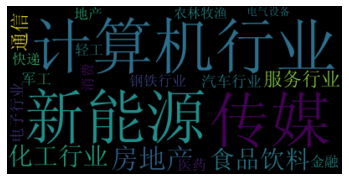

In [134]:
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt  
import jieba.analyse as anls  
import re
from collections import Counter
 

 
#1、读取文本
text = open("title.txt", 'r', encoding='utf-8').read()
#加载停用词表
stopwords = [line.strip() for line in open('stopword.txt', encoding='UTF-8').readlines()]  # list类型
#分词未去停用词
text_split = jieba.cut(text)  # 未去掉停用词的分词结果   list类型
 
#去掉停用词的分词结果  list类型
text_split_no = []
for word in text_split:
    if word not in stopwords:
        text_split_no.append(word)
#print(text_split_no)
 
text_split_no_str =' '.join(text_split_no)  #list类型分为str
 
#基于tf-idf提取关键词
print("基于TF-IDF提取关键词结果：")
keywords = []
for x, w in anls.extract_tags(text_split_no_str, topK=20, withWeight=True):
    keywords.append(x)   #前20关键词组成的list
keywords = ' '.join(keywords)   #转为str
print(keywords)
 
 
#画词云
wordcloud = WordCloud(font_path="simsun.ttf",background_color="white",width=1000,height=880).generate(keywords)   #keywords为字符串类型
 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
 
 

测试用...哪个更好看点

(-0.5, 999.5, 879.5, -0.5)

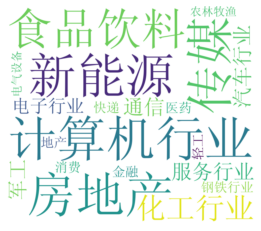

In [135]:
wordcloud = WordCloud(font_path="simsun.ttf",background_color="white",width=1000,height=880).generate(keywords)   #keywords为字符串类型
 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
 